# Assignment 3: Clustering California Housing with K-means

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you (for free) from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [65]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd

np.random.seed(42)

def load_data():
    csv_path = os.path.join("housing.csv")
    return pd.read_csv(csv_path)


housing = load_data()
df = load_data()

housing = housing.drop('ocean_proximity',axis=1)
df = df.drop('ocean_proximity', axis=1)

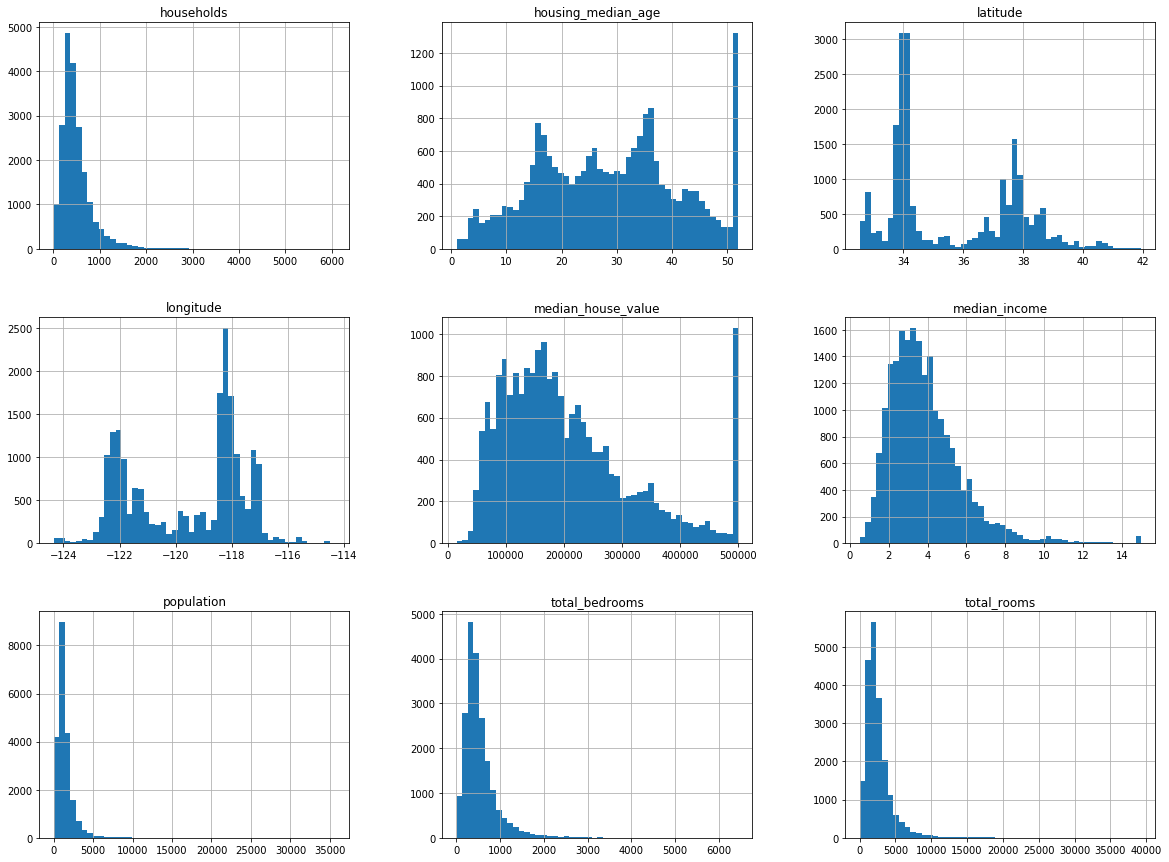

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

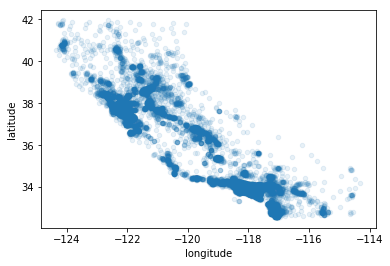

In [67]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

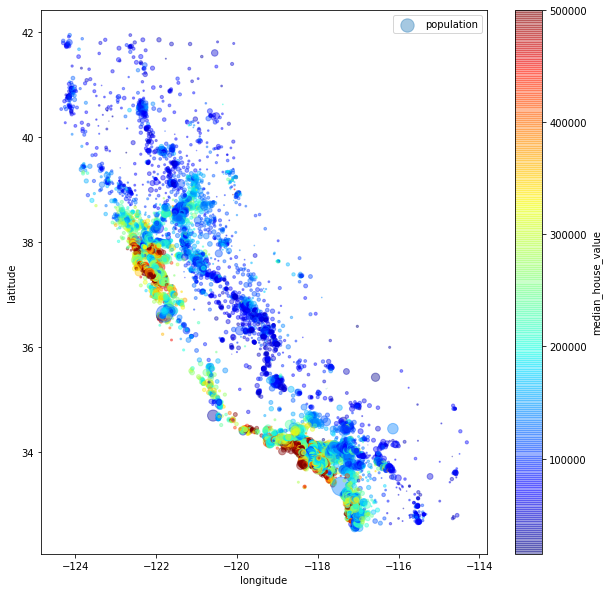

In [69]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,10),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

In [70]:
# pipeline transformation
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy="median")),
])
housing = my_pipeline.fit_transform(housing)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include the Euclidean distance which is:
$d(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}2]{\sum\limits_{i=1}^n|x_i - y_i|^2}$

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [44]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

# Initialization of centroids and data into random clusters 
def initialize(dataset, k):
    clusters = np.random.choice(range(k), dataset.shape[0]) # places existing data points into random clusters 
    # print(clusters)
    centroids = np.empty(k, dtype = np.ndarray) # creates centroids
    for i in range(k):
        centroids[i] = np.mean(dataset[clusters==i], axis=0) # based on averages of data 
        # prints(centroids)
    return clusters, centroids

# Euclidean Distance Calculator 
def dist(a, b):
    return np.linalg.norm(b-a)

# Update step based on data points distance to 
def update(dataset, clusters, centroids):
    check = False
    currMin = [100000000000000, 100000000000000] # set initial minimum 
    for i in range(len(dataset)): # updating the cluster assignments 
        for j in range(len(centroids)):
            # print(check)
            distances = dist(dataset[i], centroids[j]) # calculating the euclidean distances 
            # print(distances)
            if distances < currMin[1]:
                # print(currMin)
                currMin = [j, distances] # keeps track of centroids and min distance 
        if not check: # if clusters have not changed
            if abs(clusters[i] - currMin[0]) > 0.0001: # threshold check 
                check = True
                clusters[i] = currMin[0] # changes clusters to current centroid 
                # print(clusters)
        else:
            clusters[i] = currMin[0] # similar check 
            # print(clusters)
            # print(currMin)
        currMin = [100000000000000, 100000000000000] # resets current min 
    
    for i in range(len(centroids)): # update centroids
        centroids[i] = np.mean(dataset[clusters==i], axis=0) # using new clusters 
    return check

def KMeans(dataset, k):
    clusters, centroids = initialize(dataset, k) # initializes the clusters and centroids 
    update_check = update(dataset, clusters, centroids) # gets initial update check 
    while(update_check): # while loop goes as long as update_check is True 
        update_check = update(dataset, clusters, centroids) # used to stop while loop and keep updating 
    return clusters, centroids


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Write down the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.

**Implementation Notes:** For each k, report the training and validation accuracy. Identify the k with the highest validation accuracy, and report the test accuracy with this choice of k. Note: if multiple values of k result in the highest validation accuracy, then report test accuracies for all such values of k. Then, plot the data points with different markers corresponding to different classes. Repeat this process for all k and discuss the smoothness of the regions as k increases.


Cluster 1 SSE : 49110.342707182004
Cluster 2 SSE : 100620.36450966603
Total SSE when k = 2: 149730.70721684804
              Feature    Mean 1     STD 1    Mean 2     STD 2
0           longitude -1.047083  0.475129  0.776389  0.397953
1            latitude  1.067419  0.476202 -0.791468  0.319506
2  housing_median_age  0.036602  1.047755 -0.027140  0.962164
3         total_rooms -0.110514  0.702632  0.081944  1.166038
4      total_bedrooms -0.146569  0.713952  0.104414  1.149030
5          population -0.186269  0.699147  0.138114  1.155092
6          households -0.145661  0.744023  0.108004  1.141762
7       median_income -0.056294  0.976142  0.041741  1.015316
8  median_house_value -0.111007  1.019503  0.082310  0.977182


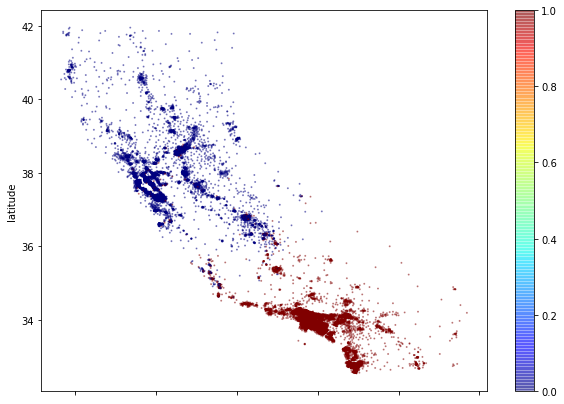

Cluster 1 SSE : 44975.53835096688
Cluster 2 SSE : 38711.39846681362
Cluster 3 SSE : 26264.248558452633
Total SSE when k = 3: 109951.18537623313
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.781686  0.367478 -1.052841  0.471797  0.199156   
1            latitude -0.804773  0.282072  1.078424  0.469180 -0.178106   
2  housing_median_age  0.086604  0.923777  0.081615  1.043628 -0.946714   
3         total_rooms -0.214102  0.500385 -0.207252  0.521558  2.367258   
4      total_bedrooms -0.197778  0.529053 -0.244002  0.533553  2.413653   
5          population -0.138170  0.574030 -0.280913  0.531327  2.246799   
6          households -0.191350  0.531528 -0.249093  0.553164  2.427763   
7       median_income  0.020773  1.017389 -0.066706  0.981380  0.194531   
8  median_house_value  0.066676  0.980359 -0.117308  1.023599  0.151379   

      STD 3  
0  0.974228  
1  0.906596  
2  0.718175  
3  1.787709  
4  1.603702  
5  1.787282  
6  1.58

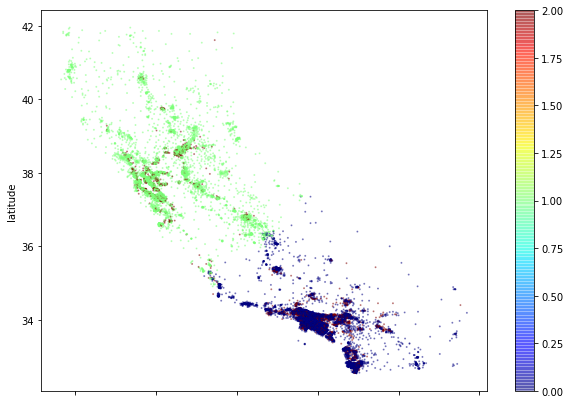

Cluster 1 SSE : 17923.465730304597
Cluster 2 SSE : 24252.76071690243
Cluster 3 SSE : 26019.760521227527
Cluster 4 SSE : 26652.844969837017
Total SSE when k = 4: 94848.83193827156
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.022373  0.953494  0.188827  0.980528 -1.042938   
1            latitude -0.236786  0.825814 -0.160909  0.915251  1.118933   
2  housing_median_age  0.093864  1.038230 -0.972393  0.707729  0.067246   
3         total_rooms  0.038922  0.628950  2.457350  1.830290 -0.236424   
4      total_bedrooms -0.216523  0.548338  2.524164  1.624949 -0.241081   
5          population -0.272682  0.520450  2.349769  1.823248 -0.277685   
6          households -0.194636  0.562990  2.538546  1.601926 -0.251404   
7       median_income  1.541819  1.195567  0.132693  0.841435 -0.299968   
8  median_house_value  1.728057  0.715148  0.079858  0.864879 -0.373433   

      STD 3    Mean 4     STD 4  
0  0.472212  0.796047  0.385283  
1 

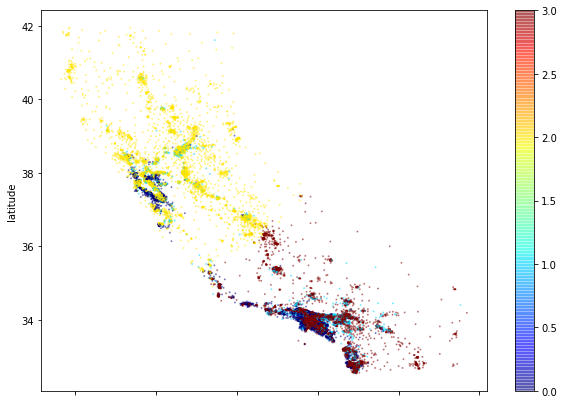

Cluster 1 SSE : 15926.08231766463
Cluster 2 SSE : 22646.582580649614
Cluster 3 SSE : 7060.358109245256
Cluster 4 SSE : 21166.65565842343
Cluster 5 SSE : 15823.072280946717
Total SSE when k = 5: 82622.75094692965
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.169151  0.955494 -1.047485  0.473194  0.361557   
1            latitude -0.175206  0.895628  1.129462  0.481263 -0.267917   
2  housing_median_age -0.797767  0.732991  0.114821  1.035147 -1.324356   
3         total_rooms  1.278007  0.813391 -0.296657  0.440709  5.261784   
4      total_bedrooms  1.394416  0.771775 -0.305133  0.467167  5.085330   
5          population  1.289446  0.804834 -0.337899  0.476085  4.907644   
6          households  1.416402  0.741800 -0.318493  0.482313  5.071972   
7       median_income  0.031729  0.799773 -0.311235  0.647358  0.300371   
8  median_house_value  0.055283  0.840205 -0.384082  0.735291  0.063328   

      STD 3    Mean 4     STD 4    Me

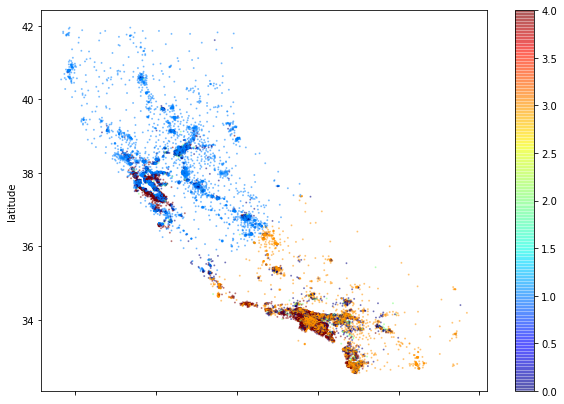

Cluster 1 SSE : 17131.496722196473
Cluster 2 SSE : 16598.168171009016
Cluster 3 SSE : 14447.707521914062
Cluster 4 SSE : 8790.360796608458
Cluster 5 SSE : 10149.448083536143
Cluster 6 SSE : 9885.215013385303
Total SSE when k = 6: 77002.39630864945
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.782548  0.385448 -1.045846  0.485663  0.043354   
1            latitude -0.779993  0.326593  1.136899  0.484244 -0.255089   
2  housing_median_age  0.247683  0.861415  0.273185  1.013912  0.171282   
3         total_rooms -0.416425  0.335996 -0.433286  0.337114 -0.078691   
4      total_bedrooms -0.369301  0.374580 -0.443794  0.363963 -0.333195   
5          population -0.275669  0.439780 -0.471927  0.376971 -0.382179   
6          households -0.365421  0.380865 -0.461931  0.379236 -0.315693   
7       median_income -0.325267  0.627614 -0.360552  0.641335  1.637352   
8  median_house_value -0.318501  0.611517 -0.423370  0.739080  1.792737   

 

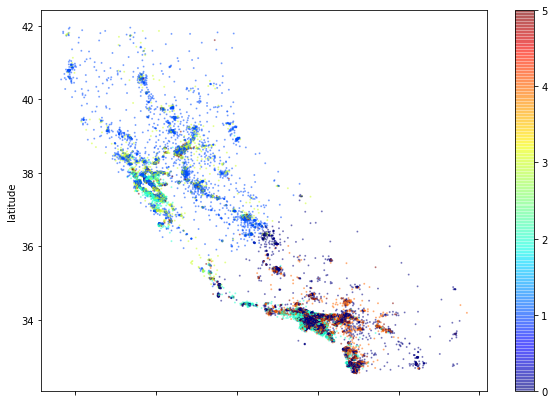

Cluster 1 SSE : 10744.855166325218
Cluster 2 SSE : 9412.36535308235
Cluster 3 SSE : 9466.820142355191
Cluster 4 SSE : 5221.005938947346
Cluster 5 SSE : 9928.887460044818
Cluster 6 SSE : 15253.841571443032
Cluster 7 SSE : 10238.178010899506
Total SSE when k = 7: 70265.95364309745
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.776588  0.367191  0.809367  0.438964  0.628457   
1            latitude -0.788825  0.282198 -0.782151  0.382499 -0.762154   
2  housing_median_age  0.498201  0.766380 -0.566853  0.743420  0.021278   
3         total_rooms -0.525448  0.284099  0.253298  0.446797 -0.057012   
4      total_bedrooms -0.484435  0.324008  0.375749  0.476095 -0.304796   
5          population -0.381025  0.395032  0.416837  0.584457 -0.351874   
6          households -0.480194  0.334457  0.377648  0.462245 -0.289990   
7       median_income -0.362506  0.604780 -0.206821  0.634206  1.589038   
8  median_house_value -0.323584  0.599846 -0.

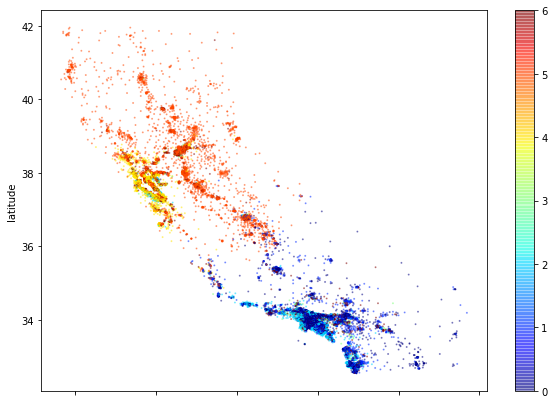

Cluster 1 SSE : 8227.090420063761
Cluster 2 SSE : 5074.671844333083
Cluster 3 SSE : 6132.733340208754
Cluster 4 SSE : 10923.143470262597
Cluster 5 SSE : 8950.280127429654
Cluster 6 SSE : 7621.41565748649
Cluster 7 SSE : 8797.37264467664
Cluster 8 SSE : 9440.539442969819
Total SSE when k = 8: 65167.2469474308
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.854069  0.388963  0.325477  0.952665 -1.109053   
1            latitude -0.825508  0.319495 -0.265215  0.907647  1.115447   
2  housing_median_age -0.522942  0.755243 -1.388014  0.588342  0.927186   
3         total_rooms  0.295131  0.454216  6.115265  2.439580 -0.499491   
4      total_bedrooms  0.443643  0.474991  5.786524  2.054602 -0.478160   
5          population  0.486606  0.589513  5.692220  2.920852 -0.501251   
6          households  0.446122  0.458456  5.838913  2.019448 -0.488849   
7       median_income -0.233778  0.624954  0.414781  0.843949 -0.540388   
8  median_house

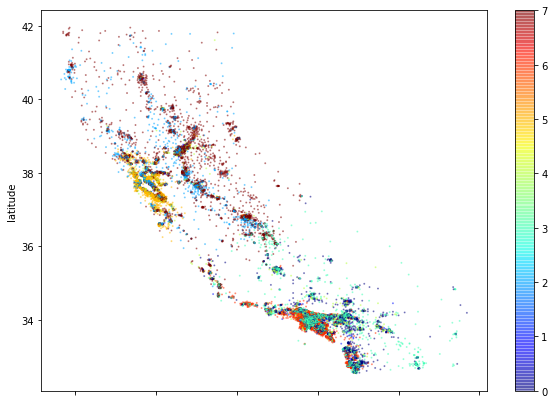

Cluster 1 SSE : 7353.5556090114105
Cluster 2 SSE : 9162.187997934054
Cluster 3 SSE : 9038.01175949879
Cluster 4 SSE : 4543.437817954141
Cluster 5 SSE : 6617.936675505869
Cluster 6 SSE : 7003.020730536945
Cluster 7 SSE : 4743.526859836177
Cluster 8 SSE : 5674.901418367011
Cluster 9 SSE : 7676.809501378178
Total SSE when k = 9: 61813.38837002258
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude  0.708748  0.318605 -0.914893  0.561275  0.792164   
1            latitude -0.822435  0.216410  1.183205  0.562231 -0.787434   
2  housing_median_age  0.060063  0.930217  0.106801  0.937226  0.453223   
3         total_rooms -0.181522  0.423652 -0.499313  0.316279 -0.528478   
4      total_bedrooms -0.316407  0.400420 -0.493382  0.351140 -0.465387   
5          population -0.360136  0.368787 -0.513386  0.369102 -0.342062   
6          households -0.297777  0.409158 -0.526700  0.360579 -0.463738   
7       median_income  0.733338  0.660596 -0.623625  0

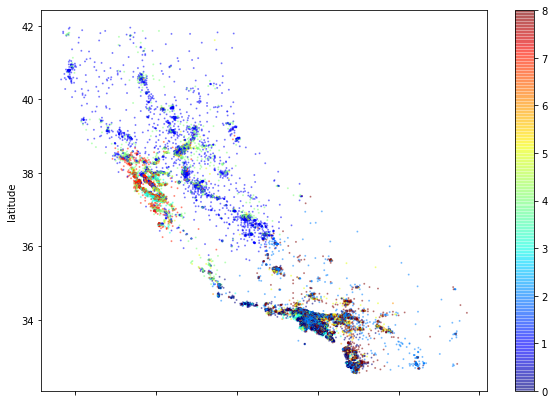

Cluster 1 SSE : 8878.823534070989
Cluster 2 SSE : 5165.70131936897
Cluster 3 SSE : 5769.773983336685
Cluster 4 SSE : 6280.007479948846
Cluster 5 SSE : 6147.894230797742
Cluster 6 SSE : 6332.531212073062
Cluster 7 SSE : 4136.960354487425
Cluster 8 SSE : 4195.727706147717
Cluster 9 SSE : 5953.044099674215
Cluster 10 SSE : 5707.451335541116
Total SSE when k = 10: 58567.91525544677
              Feature    Mean 1     STD 1    Mean 2     STD 2    Mean 3  \
0           longitude -0.966943  0.528397  0.844367  0.549948  0.147829   
1            latitude  1.220656  0.537776 -0.733007  0.509633 -0.130699   
2  housing_median_age  0.160454  0.933894 -0.901640  0.508863 -0.980088   
3         total_rooms -0.492738  0.322259 -0.322623  0.369761  2.489617   
4      total_bedrooms -0.485813  0.357051 -0.293952  0.396942  2.576312   
5          population -0.509734  0.373644 -0.292397  0.414372  2.350921   
6          households -0.518272  0.367751 -0.319696  0.387721  2.590389   
7       median_inco

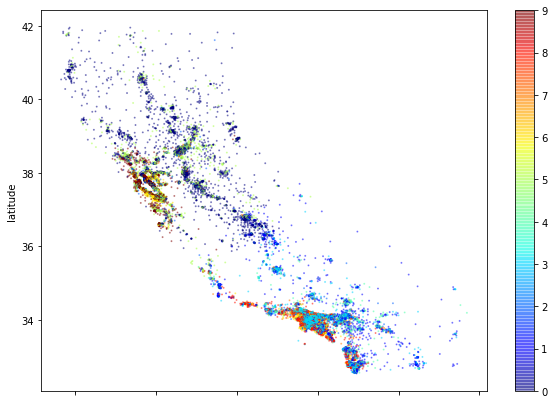

In [79]:
# Finding the cluster SSEs, total SSE, cluster means, and cluster standard deviations 
# Done through a for loop for k values from 2 to 10 

all_SSEs = []
for k in range(2, 11): # for k values 2 to 10
    features = list(df) # features 
    feats = pd.DataFrame({"Feature": features})
    clusters, centroids = KMeans(housing, k) # call to kmeans for inputted k value 
    SSEs = [] # array for sse for each cluster 
    total = [] # total sse 
    for i in range(len(centroids)):
        sse = 0 # initialize sse 
        temp = housing[clusters==i]  # creates temp array with clusters 
        # print(temp)
        for j in temp:
            sse += (dist(j, centroids[i])**2) # calculates the sse for each cluster/centroid
            # print(sse)
        SSEs.append(sse) 
        # print(SSE_clusters)
        t = i + 1
        c = centroids[i] # finds each centroid 
        # print(c)
        # print(centroids)
        st_dev = np.std(temp, axis=0)
        print("Cluster " + str(t) + " SSE : " + str(sse))
        feats['Mean '+str(t)] = c 
        feats['STD '+str(t)] = st_dev

    print("Total SSE when k =", str(k) + ":", sum(SSEs))
    total.append(sum(SSEs))
    print(feats)
    
    df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
        c=clusters, cmap=plt.get_cmap("jet"), s=1)
    plt.show()
all_SSEs.append(total)

## ANALYSIS

**There is a clear divide between North California and South California, and looking at the calculated values for cluster means and standard deviations it makes sense as to why specifying a k-value of 2 would yield such a divide in California. Northern California has a lower median house value and a lower median income, which may seem surprising because of the fact that Northern California is the home for the global center of technology, Silicon Valley. The counties and regions highlighted in Northern California are not extremely populated, showed by the significantly smaller population feature value. Northern California, despite the concentrated portions of San Fransisco, Silicon Valley, and Sacremento, is mostly very rural land except for the those three major cities which are very sparsely spread. A majority of the first cluster is mountainous terrain, shown by the very sparse clusters except for the three highlighted cities and their surrounding subarbs.** 

**The South California portion is way more highly concentrated, as it holds the counties of Los Angeles, Orange, San Diego, San Bernardino, and Riverside. These are the five most populous counties in California, and are within the top fifteen most populous counties in the country. This is reflected in cluster two's high population feature value. The graph also shows just how densely populated Southern California is. Some of the sparser regions in Southern California could be attributed to the overlapping desert, with San Bernardino county housing the infamous Death Valley. I feel as though the divide is definitely attributed to the population density between the two regions, which in turn has a high effect on median income and median house value in those regions.** 

**When the number of clusters was changed, it was really interesting to see how clusters formed and separated the state of California. The clusters still revolved around highly populated areas, but it was really cool to see the actual classification of each county based on the accumulation of all nine features at hand. It was really easy to pick out Silicon Valley from just looking at all the median incomes when k = 10. I verified with my color map, but it was really baffling to me how much greater Silicon Valley's median income was than say, Los Angeles -- which is a city known for celebrities, fashion, and high living expenses. Los Angeles still does have the second highest median income, but Silicon Valley's is almost triple that. Upon further research, it began to make sense for me. Los Angeles has an income disparity because we have these celebrities and people of higher influence, yet we still have normal people being store clerks, waiters, bartenders, etc. The majority of people living in Los Angeles aren't incredibly wealthy, they're normal. Silicon Valley, on the other hand, has a majority of people (especially young people) making six figures off the bat and normal people, like janitors, restaurant workers, etc. are outnumbered. It has a larger income disparity, which is reflected with its high standard deviation for median income as well.**


- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



**The California Housing Crisis is something that has been plaguing the individuals of the state since 1970. The cause of the California Housing Crisis is the lack of supply to the overpowering demand for new houses. California is a state that has continued to lead the forefront on things such as technology and entertainment, and have created thousands of jobs in the process. The only problem is that houses are not being constructed fast enough for these individuals taking on these new jobs. For example, from 2012 to 2017, San Fransisco issued over 400,000 jobs but only 60,000 housing permits. To me, this is absolutely heartbreaking. This shortage of houses is what has driven the prices of houses so high, creating clean divides in California based on features such as median house value and median income. In the clustering above, counties and regions were clustered based on the combination of nine features that all reflected some aspect of the California housing market -- from total bedrooms in a house to median house value. Each feature helped distinguish correct clusters that accurately depicted California. Only using a k-value of 2 gave us a visual that took extra to interpret, because it is difficult to pinpoint exactly why the state would be split so cleanly in the middle. The addition of more clusters definitely helps create a more solid insight. With that being said, a k-value of 10 created a visual that was a little too messy to interpret because of all the overlapping with certain clusters. The importance of clustering can be highlighted in this very study as it correctly classified regions in California based on housing values. The information and insight gained in this study could be useful in figuring out the next steps in the California Housing Crisis. Some ways to fix this house shortage would be to (1) streamline processes that allow housing permits to be approved quicker, (2) create more job opportunities and equivalent housing opportunities in less densely populated areas of California, allowing for a gradual dispersion of individuals throughout the state, (3) create reform from the federal government that allows more funding to be given to areas in California to aid in the construction of new homes.** 

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 3:...".

Best of luck and have fun!